Run pip install if there is no uproot package:
```bash
pip install --upgrade uproot4 awkward1 particle boost-histogram matplotlib  pandas numexpr autograd hist hist[plot] humanize
```

You can install it right from jupyter by adding ! in the begining. Create a new cell in Jupyter and put there

```bash
 !pip ... # the line above
```

"!" sign allows to run any console command. Like

```bash
 !env|grep USER
```
That is cool because you can save and document bash commands.
One can even install pure bash notebooks (with bash language instead of python)


In [1]:
!ls -lah ../sample_data/*.root

-rw-r--r-- 1 romanov romanov 464K Dec 15 22:50 ../sample_data/g4e_output.geo.root
-rw-r--r-- 1 romanov romanov  86M Dec 15 22:51 ../sample_data/g4e_output.root


In [2]:
import uproot4
from matplotlib import pyplot as p
from hist import Hist
import hist
import awkward1 as ak
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.image as mpimg

# Pretty printing arrays
from pprint import pprint

In [3]:
file=uproot4.open("../sample_data/g4e_output.root")

# To see all object names in the file:
file.items()

# only names: file.keys(), file.values()))

# To see items in subdirectories
# file.keys(recursive=True)

# There are more functions related to file:
# https://uproot.readthedocs.io/en/latest/uproot.reading.ReadOnlyFile.html

# Root directories:
# https://uproot.readthedocs.io/en/latest/uproot.reading.ReadOnlyDirectory.html

# To read multiple files at once (aka TChain)
# https://uproot.readthedocs.io/en/latest/basic.html#iterating-over-many-files


[('events;3', <TTree 'events' (49 branches) at 0x7f3d88077490>),
 ('events;2', <TTree 'events' (49 branches) at 0x7f3d4f2265e0>)]

In [4]:
# File has a data tree called 'events'
# get events tree as a separate thing
tree = file["events"]

# Print number of entries
print(f"Number of entries: {tree.num_entries}")

# Uncomment this to see all values:
tree.show()


# More TBranch functions:
#https://uproot.readthedocs.io/en/latest/uproot.behaviors.TBranch.TBranch.html



Number of entries: 1000
name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
event_id             | uint64_t                 | AsDtype('>u8')
hit_count            | uint64_t                 | AsDtype('>u8')
hit_id               | std::vector<uint64_t>    | AsJagged(AsDtype('>u8'), he...
hit_trk_id           | std::vector<uint64_t>    | AsJagged(AsDtype('>u8'), he...
hit_ptr_id           | std::vector<uint64_t>    | AsJagged(AsDtype('>u8'), he...
hit_parent_trk_id    | std::vector<uint64_t>    | AsJagged(AsDtype('>u8'), he...
hit_vol_name         | std::vector<std::string> | AsObjects(AsVector(True, As...
hit_x                | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
hit_y                | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
hit_z                | std::vector<double>      | AsJagged(AsDtype('>f8'), he...
hit_i_rep            | std::vector<u

In [5]:
# To load WHOLE data from a branch as an array:
# Use only 10 events, to not to load millions of hits at once
hit_z = tree['hit_z'].array(entry_stop=10)

# library=np to return/convert array as a numpy library.

# print(hit_xyz)
# print(f"There are total: {len(hit_xyz['hit_x'])} hits records")

# 261
# [[...],[...], .... ]

# for hits_in_event in hit_z:
#    print(f"Hits in the event: {len(hits_in_event)}")

In [6]:
# It is possible to convert multiple branches, apply formulas, aliases, etc.
# arrays method is to be used for this

# Instead of this:
# hit_z = tree['hit_z'].array()
# hit_y = tree['hit_y'].array()
# hit_z = tree['hit_z'].array()

# We read only 10 events

# For numpy:
hits = tree.arrays(filter_name="hit*", library='np', entry_stop=10)

# The resulting will be a dict like:
# { 'par0': array([ 5.81875  ,  7.471875 ,  ...],
#   'par1': array([ 5., 14.,  3., ... ],
#   ...}

# If you need only arrays, .values() function may be used
# Finally you can unpack it as values (I use only 3 of pars here using [0,1,2] mask)
hits_x, hits_y, hits_z = tree.arrays(filter_name="hit_[x,y,z]", library='np', entry_stop=10).values()

# Full info on this array methods
# https://uproot.readthedocs.io/en/latest/basic.html#reading-multiple-tbranches-as-a-group-of-arrays

In [11]:
tree['hit_vol_name'].interpretation

AsObjects(AsVector(True, AsString(False)))

In [7]:
#   I T E R A T E


# If you have a large file, you want to read it in chunks. The chunks are arrays as above
#https://uproot.readthedocs.io/en/latest/basic.html#iterating-over-intervals-of-entries

# Iterate by 100 events
for batch in tree.iterate(['hit_vol_name', 'hit_trk_id', 'trk_pdg'], step_size=1, entry_stop=10):
    pass
    #print(np.char.startswith(batch.hit_vol_name, "ce_EMCAL"))
#    for one in batch.hit_vol_name:
#        print(one)
    #print(repr(batch.hit_vol_name))

# Iterate has the same functionality as 'arrays'
# https://uproot.readthedocs.io/en/latest/uproot.behaviors.TBranch.TBranch.html#iterate

## PLOTTING


[StepArtists(step=<matplotlib.lines.Line2D object at 0x7f3d2f8f2100>, errorbar=None, legend_artist=None)]

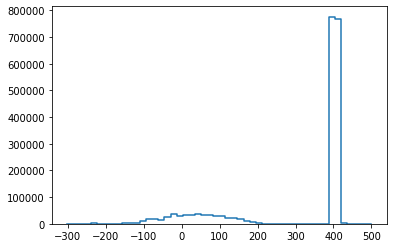

In [9]:
hit_z =tree['hit_z'].array(library='ak')
hit_z

# fill the axes
h = Hist(
    hist.axis.Regular(
        50, -302, 500, name="Z", label="z [cm]", underflow=False, overflow=False
    ),
)

flatten_array = ak.flatten(hit_z/10)

h.fill(ak.to_numpy(flatten_array))
h.plot()


# More on hist library
# https://hist.readthedocs.io/en/latest/
# https://github.com/scikit-hep/hist

# The library is very new and there might be bugs, there are a couple of other
# libraries that can work with histograms. Let me know



ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f3d2d77bca0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f3d2d70e0d0>)

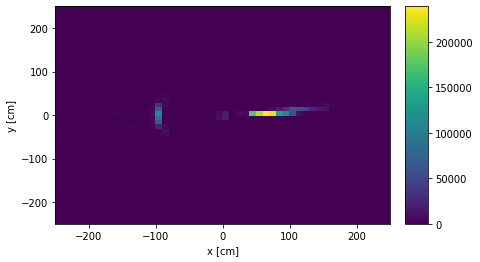

In [10]:
h = Hist(
    hist.axis.Regular(50, -250, 250, name="X", label="x [cm]", flow=False),
    hist.axis.Regular(50, -250, 250, name="Y", label="y [cm]", flow=False),
)

hit_x =tree['hit_x'].array(library='ak')
hit_y =tree['hit_y'].array(library='ak')

h.fill(ak.to_numpy(ak.flatten(hit_x/10)),
       ak.to_numpy(ak.flatten(hit_y/10)))
h.plot()


In [ ]:
type(ak.to_numpy(hit_z))




In [ ]:
yline=tree.array(b'hit_y')

In [ ]:
zline=tree.array(b'hit_z')

In [ ]:
import numpy as n

fig=p.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(-261,261):
    
    p.plot(xline[i],yline[i],zline[i])
p.show

In [ ]:
mire=tree.array(b'trk_mom')
fig=p.figure(figsize=(10,10))

for g in range(0,261):
    p.plot(mire[g])
p.xlabel("momentum [GeV]", fontsize=20)
p.ylabel("# of particles", fontsize=20)
p.show